In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

In [69]:
# Set random seed
np.random.seed(41)

# Generate 100 rows
X = np.linspace(1, 100, 100)  # independent variable
noise = np.random.normal(0, 50, 100)  # random noise
y = 2 * X + 20 + noise  # target variable

# Create DataFrame
df = pd.DataFrame({
    "Independent_Variable": X,
    "Target": y
})

In [70]:
df

,Independent_Variable,Target
0,1.0,8.464384
1,2.0,29.242403
2,3.0,38.526391
3,4.0,-18.259998
4,5.0,58.357183
...,...,...
95,96.0,269.939748
96,97.0,251.543566
97,98.0,152.864365
98,99.0,178.464973


In [71]:
df.describe()

,Independent_Variable,Target
count,100.000000,100.000000
mean,50.500000,114.017416
std,29.011492,81.714340
min,1.000000,-30.924513
25%,25.750000,51.284285
50%,50.500000,119.974450
75%,75.250000,172.699352
max,100.000000,309.517146


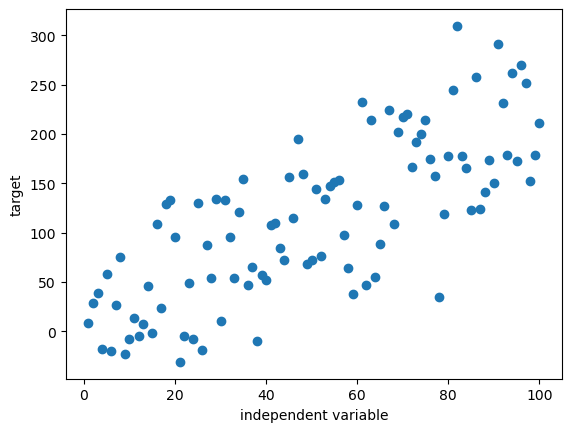

In [72]:
plt.scatter(df.Independent_Variable,df.Target)
plt.xlabel("independent variable")
plt.ylabel("target")
plt.show()

In [73]:
# train test split 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df[["Independent_Variable"]],df.Target , test_size=0.8,random_state=2)
x_train

,Independent_Variable
4,5.0
67,68.0
39,40.0
37,38.0
20,21.0
31,32.0
63,64.0
47,48.0
85,86.0
93,94.0


In [74]:
# making a liner model object
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
# fit the model 
lr.fit(x_train,y_train)


LinearRegression()

In [75]:
#  now our model is ready lets get values for slope and intercept 
print("slope of best fit line is ",lr.coef_)
print("intercept of our best fit line is ",lr.intercept_)

slope of best fit line is  [2.12234073]
intercept of our best fit line is  9.379036065952079


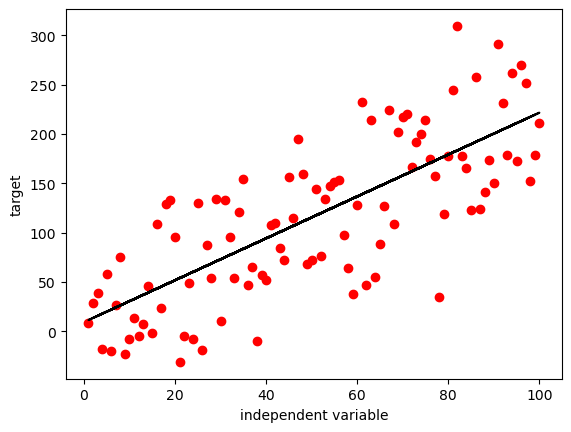

In [76]:
#  visulize our best fir line for uor data 
plt.scatter(df.Independent_Variable,df.Target,color = "red")
plt.plot(x_test,lr.predict(x_test),color = "black")
plt.xlabel("independent variable")
plt.ylabel("target")
plt.show()

In [77]:
#  calculate our model 
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
print("mean square erroris ",mean_squared_error(y_test,lr.predict(x_test)))
print("absolute error ",mean_absolute_error(y_test,lr.predict(x_test)))
print("r2 score",r2_score(y_test,lr.predict(x_test)))

mean square erroris  2786.813997811633
absolute error  44.58459290898708
r2 score 0.5906321535731291


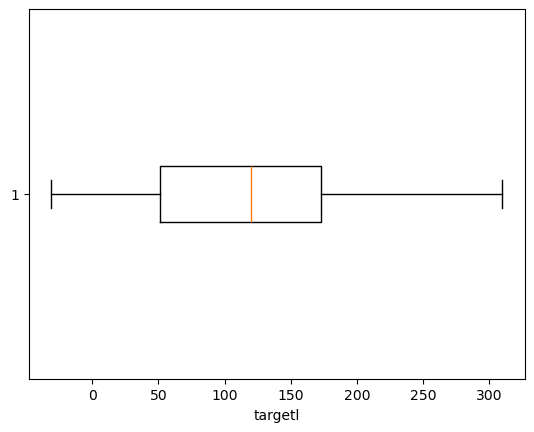

In [78]:
# boxplot for our dataset 
plt.boxplot(df.Target,vert=False)
plt.xlabel("targetl")
plt.show()

## regression techique by gradient descent


In [155]:
class gd:
    def __init__ (self,learningrate = 0.00001,epoch = 100):
        self.ep = epoch
        self.lr = learningrate
        self.coef = None
        self.intercept = None

    def fit(self,x_train,y_train):
        # initilize intercept(Bo)
        self.intercept = 0
        # initilize the coef
        self.coef = np.ones(x_train.shape[1])
        
        # now loop for number of epoch
        for i in range(self.ep):
            # now gd formula for intercept 
            y_cap = np.dot(x_train,self.coef)+ self.intercept
            intercept_derivative = -2*np.mean(y_train - y_cap)
            self.intercept = self.intercept + self.lr*(intercept_derivative)

            #  now gd formula for coef

            coef_derivative = (-2*(np.dot((y_train - y_cap),x_train)))/x_train.shape[1] 
            self.coef = self.coef + (self.lr*coef_derivative)

        return (self.intercept,self.coef)


    def predict(self,x_test):

        return (np.dot(x_test,self.coef)+ self.intercept)
        

In [156]:
# lets train our gd class
ourmodel = gd()
ourmodel.fit(x_train = x_train,y_train=y_train)

(np.float64(-2.833824996133621e+30), array([-3.47704451e+33]))

In [159]:
ourmodel.intercept

np.float64(-2.833824996133621e+30)

In [160]:
print(r2_score(y_test,ourmodel.predict(x_test)))

-6.2242339535332344e+66


In [161]:
ourmodel.coef


array([-3.47704451e+33])